# Problem Statement

We have a dataset consisting of information regarding red wine products which consist ratings given 
from 0 as lowest to 10 as the highest for the quality of the red wine product involved in observations. 
The dataset informs about the different combination of compositions of number of attributes used in formulation of that red wine sample which acquired the respective rating. 
The task or the problem in hand is to figure out for any given combinations of compositions of these attributes,
what would be the rating of any given wine sample in the range of 0 as lowest to 10 as the highest for the quality of that red wine sample. With the help of this model the business can formulate a required quality of wine for targeted customer and price
range.

# Approach for Solution-

In the available dataset, the target column is 'quality' of the given observations which ranges between 0 to 10 
which is fairly low to consider for the application of a multi-class Classification as an approach.
But, the problem can be made to understand in a better way by means of target variable transformation into a Binary Classification problem which can be created due to the low range of ordinal categorical nature of the 'quality' target feature.
We will hence create the Binary Classification model for the given dataset for the target feature 'quality' where the range of 
the 'quality' from 0 to 10 will be transformed into Binary outcome as rating<=5 - good(quality) & rating>5 - best(quality).
The predictive model will give results for the 'quality' of any given sample and in turn, figuring out which attributes should be used to formulate red wine samples of required rating.

# Essential Libraries-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading of Dataset\Data Collection -

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Initial Data Study

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.info()

#Here we observed that datatypes of dataframe are appropriate, we might not require datatype conversion process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Checking for possible Categorical and Continuous data distinguition
#Genereally, unique values>20 makes it a Continuous variable
#Hence we can observe, that the target column is the only Categorical column in data.
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
#Checking for the frequency of the wine quality ratings-
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Exploratory Data Analysis-

## Countplot

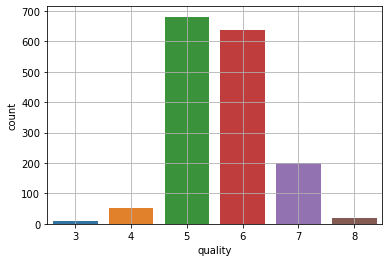

In [9]:
#Value Counts plot for wine quality rating-

sns.countplot(data=wine, x='quality')
plt.grid()

## Barplot

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

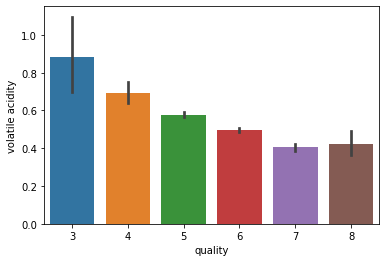

In [10]:
#Checking the relation between independant columns and target column-

sns.barplot(data=wine,x="quality", y='volatile acidity')

#Here we can see,"quality" is best when "volatile acidity" is around 0.5
#and inversely proportional relation of the two features

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

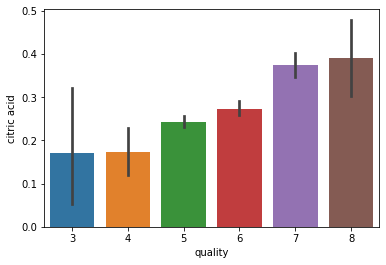

In [11]:
sns.barplot(data=wine,x='quality', y='citric acid')

#Here we can see,"quality" is best when "citric acidity" is around 0.4
#and directly proportional relation between the two features

In [12]:
# Similarly we can check for relation or pattern of target feature with remaining features

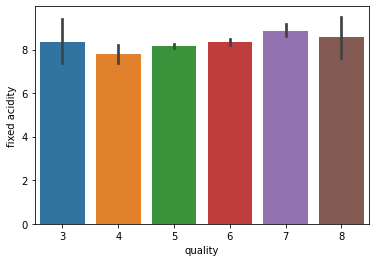

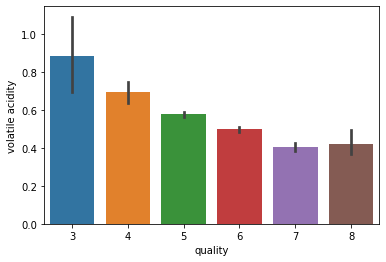

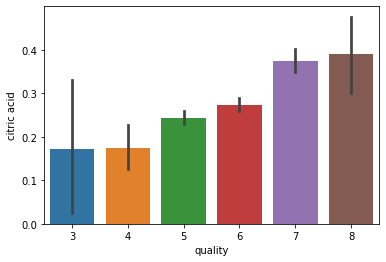

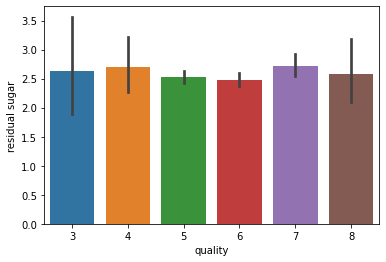

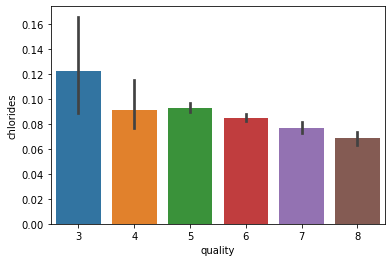

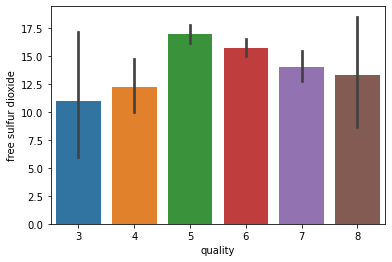

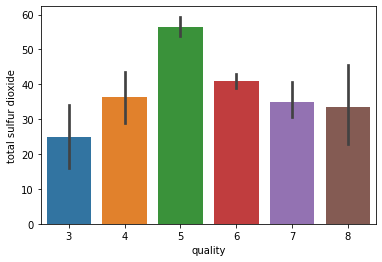

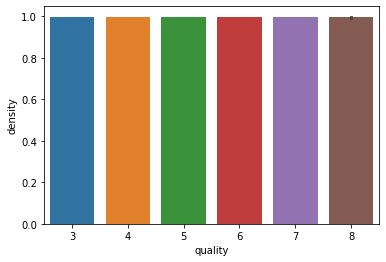

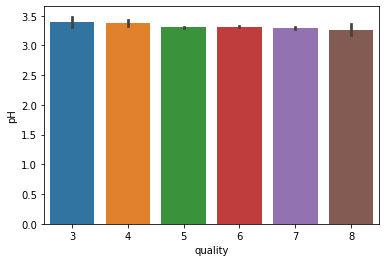

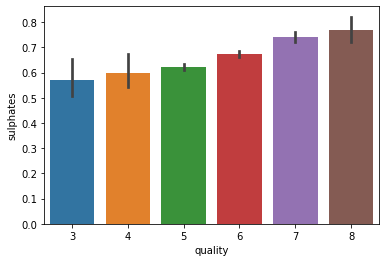

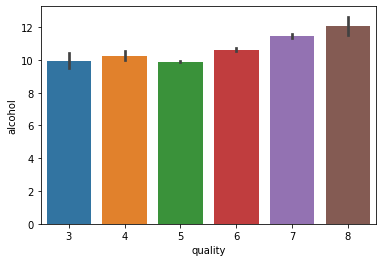

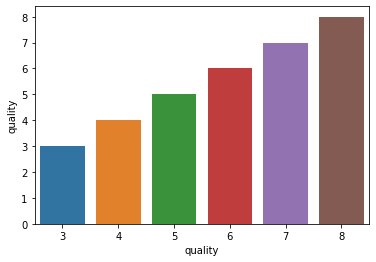

In [13]:
for i in wine.columns:
    sns.barplot(data=wine,x='quality', y=i)
    plt.show() 

## Boxplot

In [14]:
#The relation or distribution between Categorical vs Continuous variable is better understood with the help of Boxplots 
#Hence plotting Boxplots against the target(Categorical) column

Boxplot for fixed acidity by quality


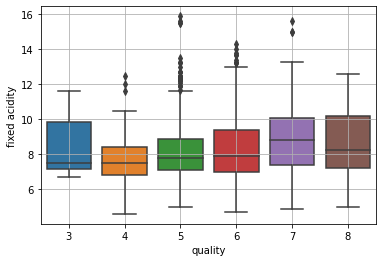

Boxplot for volatile acidity by quality


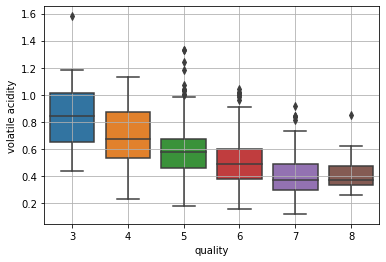

Boxplot for citric acid by quality


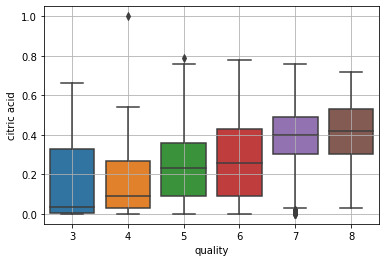

Boxplot for residual sugar by quality


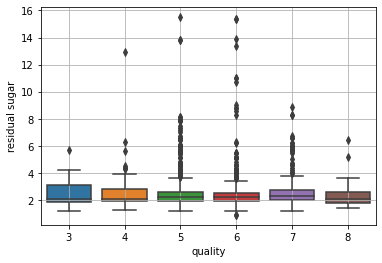

Boxplot for chlorides by quality


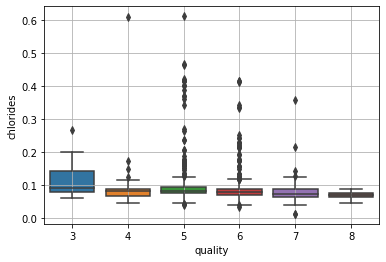

Boxplot for free sulfur dioxide by quality


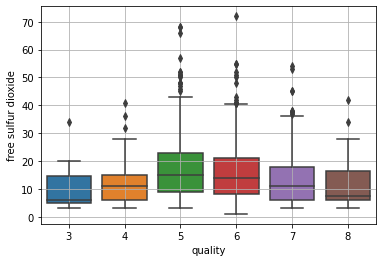

Boxplot for total sulfur dioxide by quality


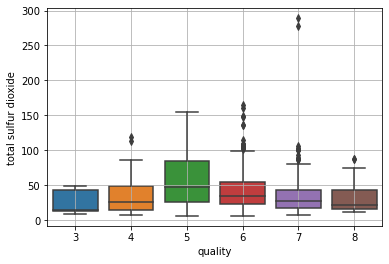

Boxplot for density by quality


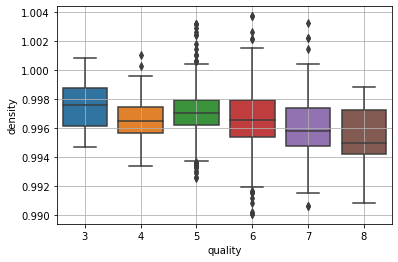

Boxplot for pH by quality


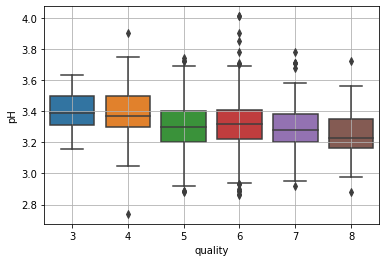

Boxplot for sulphates by quality


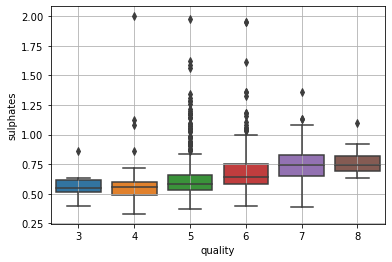

Boxplot for alcohol by quality


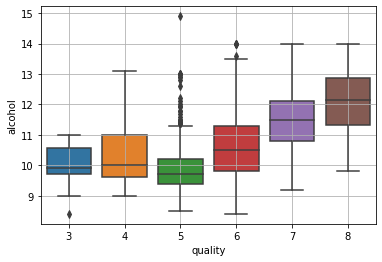

Boxplot for quality by quality


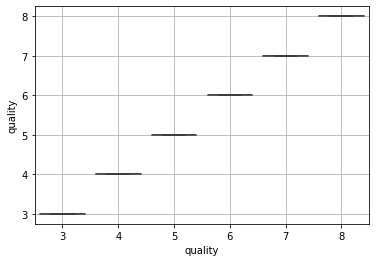

In [15]:
for i in wine.columns:
    sns.boxplot(data=wine, x='quality', y =i)
    plt.grid()
    plt.title(print(f'Boxplot for {i} by quality'))
    plt.show()

## Histogram

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

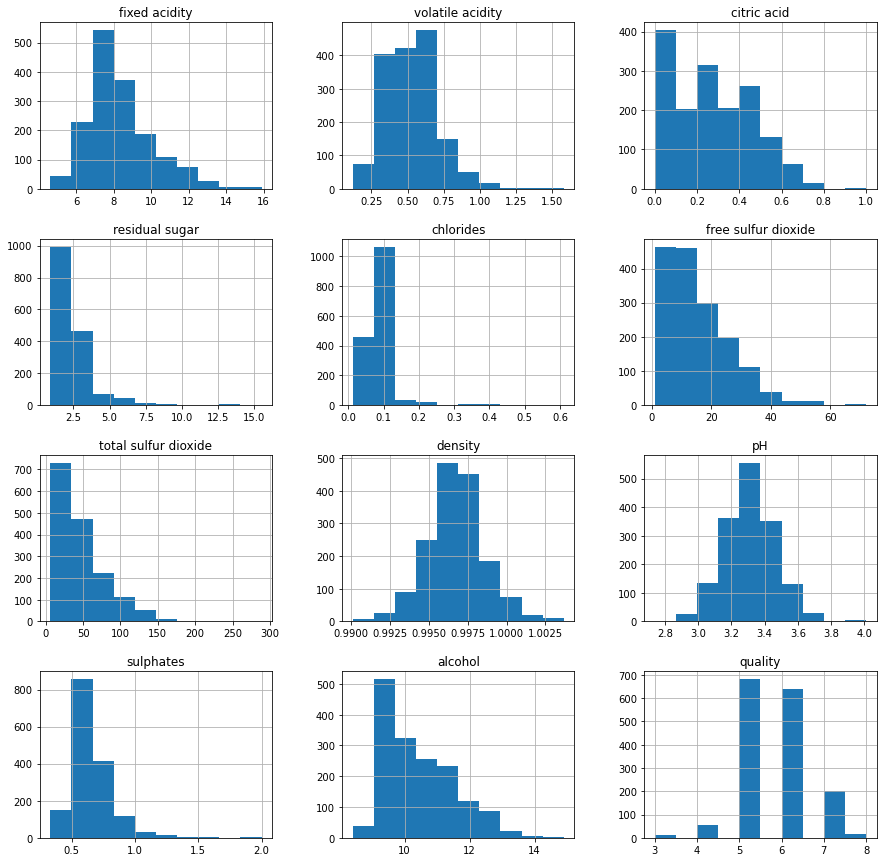

In [16]:
wine.hist(wine.columns, figsize=(15,15))

## Correlation Matrix

In [17]:
from scipy.stats import pointbiserialr as bscorr

In [18]:
from dython.nominal import associations

In [19]:
wine.corr(method='spearman')

#Here we will check for the correlation bwtween target variable and independant features, 
#value closer to 1 or -1 indicates a good relation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


<AxesSubplot: >

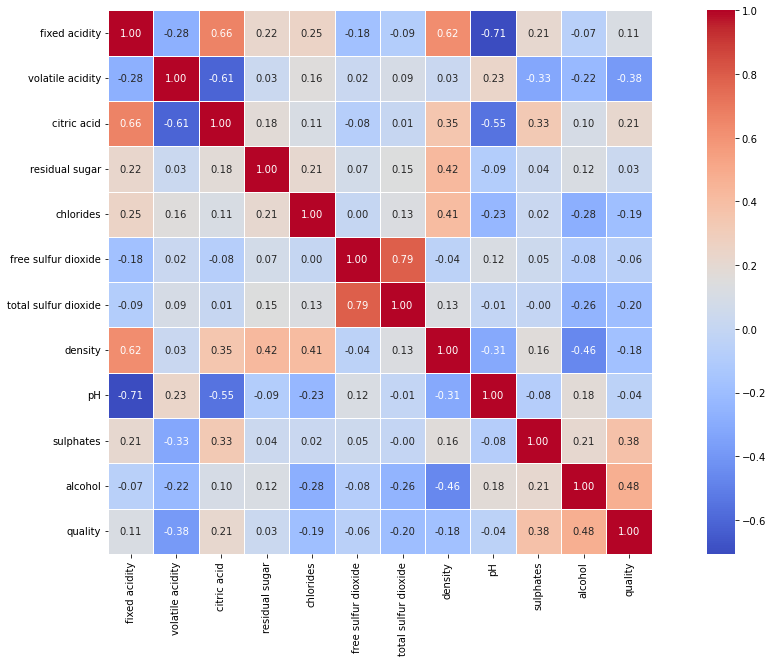

In [20]:
#Plotting the heatmap of correlation, darker blue and darker red tiles indicate good relation
# darker red- positive higher value, darker blue - negative higher value 

plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(method='spearman'), annot=True, linecolor="white",linewidths=0.65,  fmt=".2f", cmap="coolwarm",square=True)#, annot_kws={"size":10})

# Conversion of Target column values to Binary for Binary Classification approach-

The Wine Quality rating will be divided into two categories-
1. quality<=5 - good - 0
2. quality>5 - best - 1

In [21]:
wine['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [22]:
wine['quality'] = wine['quality'].apply(lambda x:1 if x>5 else 0 )
wine['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [23]:
wine['quality'].value_counts() 

1    855
0    744
Name: quality, dtype: int64

In [24]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


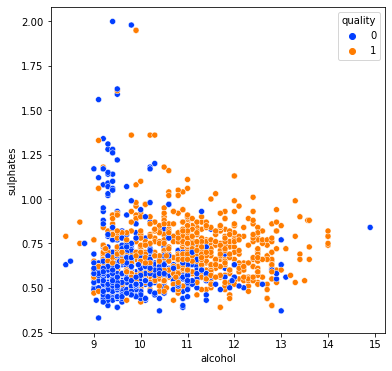

In [25]:
#Plotting the highest correlated pairs

# Two highest positively correlated features with 'quality'
plt.figure(figsize=(6,6))
plt.clf()
sns.scatterplot(data=wine, x='alcohol', y='sulphates', hue='quality', palette="bright")
plt.show()

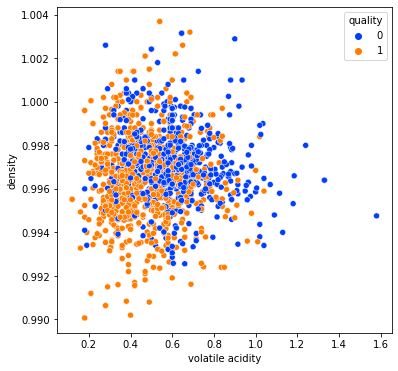

In [26]:
# Two highest negatively correlated features with 'quality'
plt.figure(figsize=(6,6))
plt.clf()
sns.scatterplot(data=wine, x='volatile acidity', y='density', hue='quality', palette="bright")
plt.show()

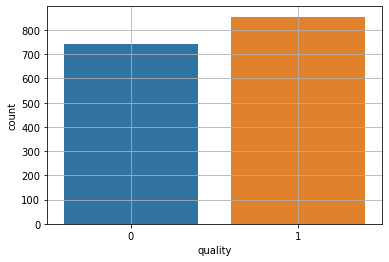

In [27]:
#Countplot for transformed target feature
sns.countplot(data=wine, x='quality')
plt.grid()

#Here we can observe that the data is not imbalanced hence we can proceed further

# Data Preprocessing

In [28]:
wine.isnull().sum()

#Since there are no NaN values, the data is clean

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
#Checking & Removing duplicate entries

wine[wine.duplicated()].shape

(240, 12)

In [30]:
#Before removing duplicates
print("Before removing duplicates: ", wine.shape)

#after removing duplicates
print("After removing duplicates: ", wine.drop_duplicates(inplace=True), wine.shape)

Before removing duplicates:  (1599, 12)
After removing duplicates:  None (1359, 12)


# Feature Scaling the Data before hold out validation

In [31]:
#Since our target feature is already in a low range compared to independant features, we would scale it

In [32]:
import copy
wine_std = copy.deepcopy(wine)

In [33]:
cols_std = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [34]:
#Using Standard Scalar to scale the data
ssc = StandardScaler()

for i in cols_std:
    wine_std[i] = ssc.fit_transform(wine_std[[i]])

In [35]:
wine_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,1
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924,1
1594,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574,0
1595,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723,1
1597,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775,0


In [36]:
#STOP HERE................STOP HERE

In [37]:
#Creating deep copy for scaling of Dataframe

import copy
wine_s = copy.deepcopy(wine)

In [38]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [39]:
mms = MinMaxScaler()

for i in cols:
    wine_s[i] = mms.fit_transform(wine_s[[i]])

In [40]:
wine_s

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.194690,0.342466,0.08,0.068493,0.093489,0.380282,0.113074,0.472834,0.535433,0.293413,0.169231,1
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,1
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0


# Feature Selection

<AxesSubplot: >

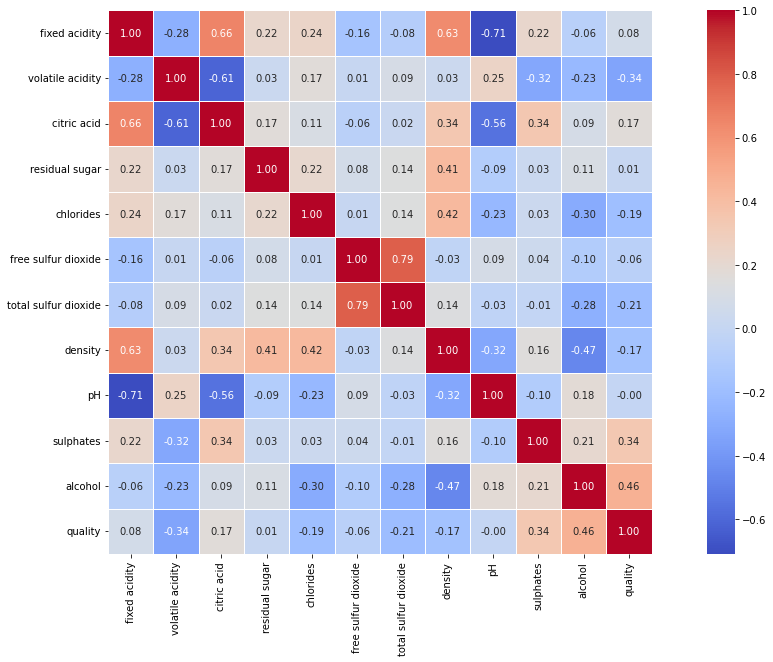

In [41]:
#Plotting the heatmap of correlation, darker blue and darker red tiles indicate good relation
# darker red- positive higher value, darker blue - negative higher value 
 
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(method='spearman'), annot=True, linecolor="white",linewidths=0.65,  fmt=".2f", cmap="coolwarm",square=True)#, annot_kws={"size":10})

In [42]:
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [43]:
winecorr = wine.corr(method='spearman')

In [44]:
# Getting the columns which have multicolinearity
col_corr = []
for i in range (len(winecorr.columns)):
    for j in range (i):
        if abs(winecorr.iloc[i,j]) > 0.7:
            colname1 = winecorr.columns[i]
            colname2 = winecorr.columns[j]
            col_corr.append([colname1,colname2])
col_corr

[['total sulfur dioxide', 'free sulfur dioxide'], ['pH', 'fixed acidity']]

In [45]:
winecorr['quality']

fixed acidity           0.077758
volatile acidity       -0.335441
citric acid             0.168331
residual sugar          0.009463
chlorides              -0.191999
free sulfur dioxide    -0.060640
total sulfur dioxide   -0.205190
density                -0.172866
pH                     -0.001222
sulphates               0.335327
alcohol                 0.460086
quality                 1.000000
Name: quality, dtype: float64

We can observe that pH & free sulfur dioxide columns have multicolinearity and less correlation with target column hence both can be dropped 

In [46]:
wine_std2 = copy.deepcopy(wine_std)
wine_std2 = wine_std2.drop(['pH','free sulfur dioxide'],axis=1)
wine_std2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.384050,0.584003,-0.578561,-0.954374,0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.604073,0.048737,0.124822,-0.584575,0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,0.214813,0.155790,-0.051024,-0.584575,0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.394471,0.691057,-0.461331,-0.584575,1
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.204391,0.584003,-0.578561,-0.954374,0
...,...,...,...,...,...,...,...,...,...,...
1593,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,-0.264277,-0.106490,0.945435,-0.861924,1
1594,-1.215536,0.385444,-0.983977,-0.387183,0.038015,-0.084619,-0.968269,-0.461331,0.062574,0
1595,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,0.124983,-0.850510,0.593744,0.709723,1
1597,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,-0.084619,-0.663167,0.300667,-0.214775,0


# Holdout Validation -

In [47]:
#Seperating the Independant and Dependant features
x = wine_std2.drop('quality', axis=1)
y = wine_std2['quality']

In [48]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.384050,0.584003,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.604073,0.048737,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,0.214813,0.155790,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.394471,0.691057,-0.461331,-0.584575
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.204391,0.584003,-0.578561,-0.954374


In [49]:
x.shape 

(1359, 9)

In [50]:
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

In [51]:
y.shape 

(1359,)

In [52]:
#Train-Test-Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

In [53]:
#Split observation
print(y.shape,y_train.shape,y_test.shape)

(1359,) (1087,) (272,)


# Model Building

## Random Forest Classifier

### Raw Model for RFC

In [54]:
#Model Instance
from sklearn.ensemble import RandomForestClassifier
rfc_wine = RandomForestClassifier()

In [55]:
#Raw Model Fitting

rfc_wine.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
#Predicting the Target Variable

y_pred_test = rfc_wine.predict(x_test)
y_pred_train = rfc_wine.predict(x_train)

In [57]:
#Raw Model Evaluation
#Raw Model performance observation

In [58]:
#Training Accuracy-
accuracy_score(y_train,y_pred_train)

1.0

In [59]:
#Testing Accuracy-
accuracy_score(y_test,y_pred_test)

0.7242647058823529

In [60]:
#Raw Model Precision Recall-

In [61]:
precision_score(y_test, y_pred_test)

0.7615384615384615

In [62]:
recall_score(y_test,y_pred_test) 

0.6923076923076923

In [63]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       129
           1       0.76      0.69      0.73       143

    accuracy                           0.72       272
   macro avg       0.73      0.73      0.72       272
weighted avg       0.73      0.72      0.72       272



In [64]:
#Use cross validation technique to solve the problem
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc_wine, x_train, y_train, cv=5)

print(rfc_cv_score)
print("Random Forest Classifier Mean Score: ", rfc_cv_score.mean().round(5)*100,'%')

[0.75688073 0.75688073 0.80184332 0.74193548 0.76497696]
Random Forest Classifier Mean Score:  76.44999999999999 %


In [65]:
#Plotting ROC Curve- 

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_test)

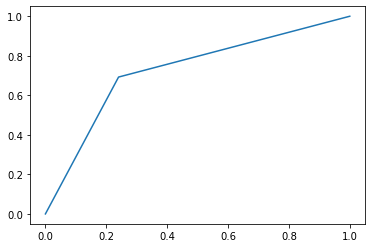

In [66]:
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier')
plt.show()

### Hyperparameter Tuning for RFC

In [67]:
#Parameter selection for RFC

param_grid = {'n_estimators':np.arange(1,50), "criterion":['gini','entropy'], 'max_depth':[3,5,7,11,15,20], 'min_samples_leaf':np.arange(1,10), 'min_samples_split':np.arange(1,10)}

In [68]:
#HPT with Cross Validation

rscv_wine = RandomizedSearchCV(rfc_wine, param_grid, cv=5) 

In [69]:
rscv_wine.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 11, 15, 20],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [70]:
rscv_wine.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=1,
                       n_estimators=38)

We found out with HPT-
- (max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=30)

### Building enhanced model with HPT findings

In [71]:
hpt_wine = RandomForestClassifier(criterion='entropy',max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=30)

In [72]:
hpt_wine.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=30)

In [73]:
y_pred_h = hpt_wine.predict(x_test)

In [74]:
#Testing Accuracy
accuracy_score(y_test,y_pred_h)

0.7279411764705882

In [75]:
rfc_hpt_testing_acc = accuracy_score(y_test,y_pred_h)

In [76]:
y_pred_h_train = hpt_wine.predict(x_train)

In [77]:
#Training Accuracy
accuracy_score(y_train,y_pred_h_train)

0.9622815087396505

In [78]:
rfc_hpt_training_acc = accuracy_score(y_train,y_pred_h_train)

In [79]:
precision_score(y_test,y_pred_h)

0.7482014388489209

In [80]:
rfc_hpt_pre = precision_score(y_test,y_pred_h)

In [81]:
recall_score(y_test,y_pred_h) 

0.7272727272727273

In [82]:
rfc_hpt_rec = recall_score(y_test,y_pred_h) 

In [83]:
print(classification_report(y_test, y_pred_h))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       129
           1       0.75      0.73      0.74       143

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.73      0.73      0.73       272



<AxesSubplot: >

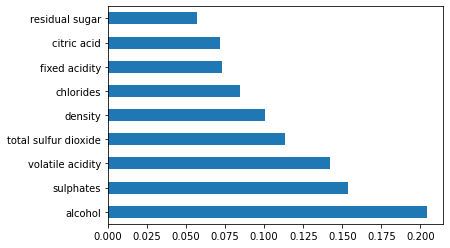

In [84]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(hpt_wine.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')  

#Hence we can say that the most impactful feature for classification is 'alcohol'

# Classification using Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression 

In [86]:
logr = LogisticRegression()

In [87]:
logr.fit(x_train, y_train)

LogisticRegression()

In [88]:
y_pred_train = logr.predict(x_train)
y_pred_test = logr.predict(x_test)

In [89]:
#Training Accuracy
accuracy_score(y_pred_train, y_train)

0.7506899724011039

In [90]:
logr_training_acc = accuracy_score(y_pred_train, y_train)

In [91]:
#Testing Accuracy
accuracy_score(y_test, y_pred_test)

0.7022058823529411

In [92]:
logr_testing_acc = accuracy_score(y_test, y_pred_test)

In [93]:
print("Logistic Regression Classifier Mean Score: ", cross_val_score(logr, x_train, y_train, cv=5).mean().round(5)*100,'%')

Logistic Regression Classifier Mean Score:  75.161 %


In [94]:
precision_score(y_test,y_pred_test)

0.7279411764705882

In [95]:
logr_prec = precision_score(y_test,y_pred_test)

In [96]:
recall_score(y_test,y_pred_test) 

0.6923076923076923

In [97]:
logr_rec = recall_score(y_test,y_pred_test)

In [98]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       129
           1       0.73      0.69      0.71       143

    accuracy                           0.70       272
   macro avg       0.70      0.70      0.70       272
weighted avg       0.70      0.70      0.70       272



In [99]:
#Plotting ROC Curve- 

fpr_logr, tpr_logr, thresholds_logr = roc_curve(y_test, y_pred_test, pos_label=1)

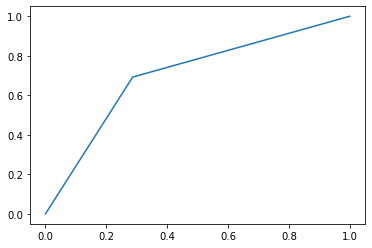

In [100]:
plt.plot(fpr_logr, tpr_logr)
plt.show()

## Algorithms Comparison

In [101]:
#Algorithm Accuracies
modac = pd.DataFrame(columns=['Training Accuracy', 'Testing Accuracy'], index=['RFC', 'LogR'], data=[[round(rfc_hpt_training_acc,3), round(rfc_hpt_testing_acc,3)],[round(logr_training_acc,3),round(logr_testing_acc,3)]])
modac

,Training Accuracy,Testing Accuracy
RFC,0.962,0.728
LogR,0.751,0.702


In [102]:
#Algorithm Precision Recall
modac = pd.DataFrame(columns=['Testing Precision', 'Testing Recall'], index=['RFC', 'LogR'], data=[[round(rfc_hpt_pre,3),round(rfc_hpt_rec,3)],[round(logr_prec,3),round(logr_rec,3)]])
modac

,Testing Precision,Testing Recall
RFC,0.748,0.727
LogR,0.728,0.692


# Conclusion

From the results of the models we can observe that the models are performing at around similar level, the Random Forest model has a better chance to learn from the data with similar testing data accuracy along with better precision and recall score hence, we will conclude that the Random Forest Classifier with Hyperparameter tuning is giving us a better result for the problem.

# Testpoint Creation

In [103]:
testpoint = [[7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35]]

In [104]:
if hpt_wine.predict(testpoint)[0]==0:
    print("For testpoint: ", testpoint)
    print("Prediction:0- Good Quality Wine(Rating-3,4 or 5)")
else:
    print("For testpoint: ", testpoint)
    print("Prediction:= **1**- Best Quality Wine(Rating-6,7 or 8)")

For testpoint:  [[7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35]]
Prediction:0- Good Quality Wine(Rating-3,4 or 5)
